# Assignment 9:  Plotting and Sorting

## Your Information

At the start of each assignment, you will need to provide us your name and the name of the partner you worked with for this assignment (if you had one). Double click on the cell below or click once and hit enter to edit it. Replace "First Last" with your first name and last name. Replace "None" with the first and last name of your partner if you had one for this assignment. We ask for this information so we don't accuse you of cheating when your code looks like your partner's.

Please keep these lines commented so they don't cause an error.

In [1]:
# MY NAME: Angel Huang
# MY PARTNER's NAME: None

## Imports

Every project will begin with some import statements. It's crucial that you run the cell below, otherwise we will not be able to grade your code and provide feedback to you.

In order to create bar plots, you will use two new packages: `matplotlib` and `pandas`. Import them below.

In [2]:
# it is considered a good coding practice to place all import statements at the top of the notebook

import student_grader
import os
student_grader.initialize(os.getcwd(), "p9")

import pandas
import matplotlib
import csv

If you saw any error messages after running the previous cell, you might have to install the packages `pandas` and `matplotlib`. You can install these packages by typing the following command into your terminal:

```shell
pip install matplotlib pandas
```

## Learning Objectives:

In this assignment, you will demonstrate how to:
* create simple plots from dictionaries,
* sort dictionaries by keys and values,
* use bucketizing to obtain useful data structures,
* use comprehensions to create lists and dictionaries.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: **P8 and P9 are two parts of the same data analysis.** You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P8, you have to sustain that partnership until end of P9.
Be careful not to work with more than one partner. If you work with a partner on Lab-P9, you are **not** allowed to finish your project with a different partner.
You may either continue to work with the same partner, or work on P9 alone. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/s25/syllabus.html).

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

## Introduction:

In Lab-P8 and P8, you learnt to parse the `mapping.csv` and `movies.csv` datasets. In P9, you will be analyzing the movies dataset using the data structures you created in P8. In Lab-P9, you will create some useful helper functions that will be needed in P9, and you will also learn to create bar plots.

## Lab portion (21 questions, 1 function)

### Task 2.1: Understand how `plot_dict` works

**Creating a dictionary** will often be the first step towards creating a bar plot in Python. In particular, each dictionary **key** might correspond to a **category** (along the *x-axis*), and each **value** might correspond to an **amount** (along the *y-axis*). To setup plotting in Python, run the following cell:

In [3]:
# we have done this for you

def plot_dict(d, label="Please Label Me!"):
    """plot_dict(d, label) creates a bar plot using the 
    dictionary 'd' and labels the y-axis as 'label'"""
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16, figsize=(4 + len(d)//4, 4))
    ax.set_ylabel(label, fontsize=16)

Let's try creating a simple dictionary and using it to create a bar plot with the `plot_dict` function:

In [4]:
# we have done this for you

# create a dictionary mapping different players to their goals scored
goals = {"Ada Lovelace": 5, "Rose Lavelle": 22, "Marta Vieira da Silva": 113}
goals

{'Ada Lovelace': 5, 'Rose Lavelle': 22, 'Marta Vieira da Silva': 113}

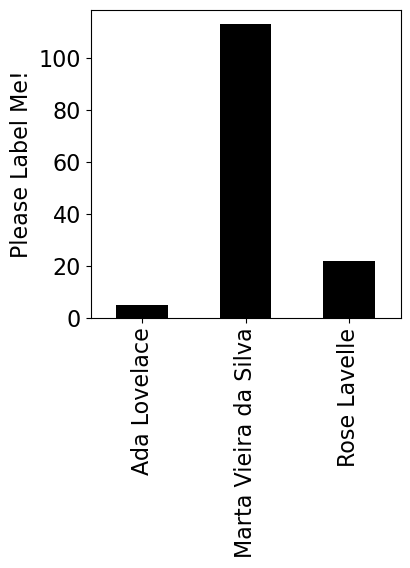

In [5]:
# we have done this for you

# create a bar plot from the data in the dictionary 'goals'
plot_dict(goals)

Since P9 is all about the movies dataset, we will now work on a **list** of movie **dictionaries**, similar to the one you created in P8. If you haven't completed P8, don't worry! The variable has been defined below and you do not need to copy any P8 code over. Run the cell below to define the variable `movies_data`. Note that this is a **list** of **dictionaries** in the same format as the **list** `movies` that you defined in P8 (and will work with, in P9).

**Important**: We define the variable directly in order to save time and simplify the lab exercises. Do **not** hardcode values of variables storing the dataset in P9. Instead use the appropriate functions to load the data from the corresponding CSV files, as you did in P8.

In [6]:
# we have done this for you
movies_data = [{'title': 'The Trees of the East',
  'year': 2018,
  'duration': 71,
  'genres': ['Thriller'],
  'rating': 9.8,
  'directors': ['Mike Ellwood'],
  'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']},
{'title': 'Avengers: Infinity War',
  'year': 2018,
  'duration': 149,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'rating': 8.4,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'cast': ['Robert Downey Jr.', 'Chris Hemsworth', 'Mark Ruffalo', 'Chris Evans']},
{'title': 'Zodiac',
  'year': 2007,
  'duration': 157,
  'genres': ['Crime', 'Drama', 'Mystery'],
  'rating': 7.7,
  'directors': ['David Fincher'],
  'cast': ['Jake Gyllenhaal', 'Robert Downey Jr.', 'Mark Ruffalo', 'Anthony Edwards']},
{'title': 'Top Gun: Maverick',
  'year': 2022,
  'duration': 130,
  'genres': ['Action', 'Drama'],
  'rating': 8.4,
  'directors': ['Joseph Kosinski'],
  'cast': ['Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Val Kilmer']},
{'title': 'Space Jam: A New Legacy',
  'year': 2021,
  'duration': 115,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 4.5,
  'directors': ['Malcolm D. Lee'],
  'cast': ['LeBron James', 'Don Cheadle', 'Cedric Joe', 'Khris Davis']},
{'title': 'The Big Short',
  'year': 2015,
  'duration': 130,
  'genres': ['Biography', 'Comedy', 'Drama'],
  'rating': 7.8,
  'directors': ['Adam McKay'],
  'cast': ['Christian Bale', 'Steve Carell', 'Ryan Gosling', 'Brad Pitt']}]

### Task 2.2: Map necessary details into a dictionary

As you can see, `movies_data` is a **list** of **dictionaries** where each **dictionary** stores information on a particular movie.

Using the `plot_dict` function, we will now create a **bar plot** that compares the `rating` of each movie in `movies_data`. The *x-axis* will contain the `title` of each movie and your *y-axis* will be the `rating`.

In [7]:
# create the dictionary first

plot_movies_data = {}
for movie in movies_data:
    plot_movies_data[movie['title']] = movie['rating']
    
plot_movies_data

{'The Trees of the East': 9.8,
 'Avengers: Infinity War': 8.4,
 'Zodiac': 7.7,
 'Top Gun: Maverick': 8.4,
 'Space Jam: A New Legacy': 4.5,
 'The Big Short': 7.8}

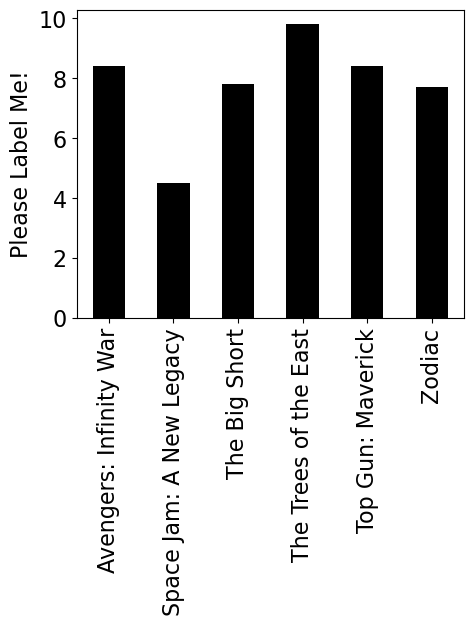

In [8]:
# then plot the dictionary

plot_dict(plot_movies_data)

Notice that in this plot, the *y-axis* is missing a label; that can be specified with the **optional** second argument to `plot_dict`.

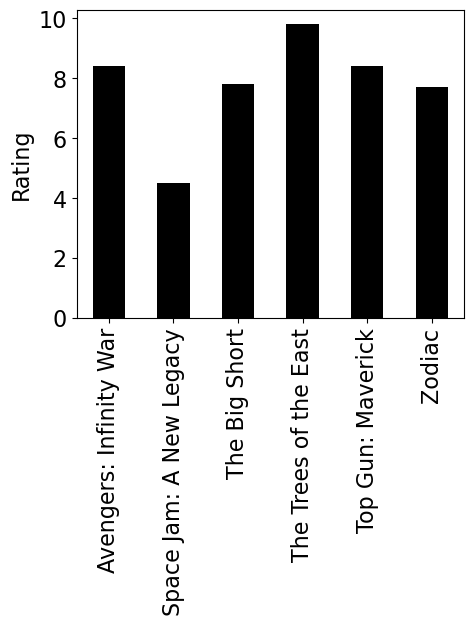

In [9]:
# provide the y-axis label as the second argument

plot_dict(plot_movies_data, 'Rating')

You are now ready to create your own bar plots in P9!

### Task 3.1: Creating a Dictionary with Custom Keys

#### Function 1: `year_to_decade(year)`

First, we are going to write the `year_to_decade` function. Given a year, this function returns a string that represents the decade that year belongs to. Here are some sample calls and the expected output:

- `year_to_decade(2003)` **must** return `'2001 to 2010'`
- `year_to_decade(2000)` **must** return `'1991 to 2000'`

Complete the code below. 

Points possible: 5.0

In [10]:
# replace the ... with your code

def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year-9) + ' to ' + str(year)
    else:
        # TODO: first find the year in which the decade starts
        #       when year is not divisible by 10
        start = (year//10)*10 + 1
        decade = str(start) + ' to ' + str(start + 9)
    return decade

In [11]:
student_grader.check("lab-year_to_decade", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-year_to_decade...
Great job! You passed all test cases for this question.


True

#### Lab question 1

Which **decade** does the `year` *2010* belong to?

Points possible: 4.0

In [12]:
# replace the ... with your code

decade_2010 = year_to_decade(2010)

decade_2010

'2001 to 2010'

In [13]:
student_grader.check("lab-q1", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q1...
Great job! You passed all test cases for this question.


True

#### Lab question 2

Which **decade** does the `year` *1891* belong to?

Points possible: 4.0

In [14]:
# replace the ... with your code

decade_1891 = year_to_decade(1891)

decade_1891

'1891 to 1900'

In [15]:
student_grader.check("lab-q2", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q2...
Great job! You passed all test cases for this question.


True

### Task 3.2: Create new dictionaries with custom keys and values

#### Lab question 3

Create a new **dictionary** that has the `title` of each movie in `movies_data` as a **key** and the **decade** it was released in as the corresponding **value**.

You **must** use the `year_to_decade` function to create this **dictionary**.

Points possible: 4.0

In [16]:
# replace the ... with your code

movies_with_decade = {}
for record in movies_data:
    movies_with_decade[record['title']] = year_to_decade(record['year'])

movies_with_decade

{'The Trees of the East': '2011 to 2020',
 'Avengers: Infinity War': '2011 to 2020',
 'Zodiac': '2001 to 2010',
 'Top Gun: Maverick': '2021 to 2030',
 'Space Jam: A New Legacy': '2021 to 2030',
 'The Big Short': '2011 to 2020'}

In [17]:
student_grader.check("lab-q3", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q3...
Great job! You passed all test cases for this question.


True

#### Lab question 4

Calculate the **average** `rating` of movies in the **decade** *2001 to 2010*.

**Hint:** You can loop through `movies_data` for each movie and use `movies_with_decade` to check which **decade** each movie is from.

Points possible: 4.0

In [18]:
# replace the ... with your code
total_rating = []

for movie in movies_data:
    decade = movies_with_decade[movie['title']]
    if decade == '2001 to 2010':
        total_rating.append(movie['rating'])

if total_rating:
    total_sum = sum(total_rating)
    total_count = len(total_rating)
    avg_rating_2001_2010 = total_sum / total_count
else:
    avg_rating_2001_2010 = None


avg_rating_2001_2010

7.7

In [19]:
student_grader.check("lab-q4", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q4...
Great job! You passed all test cases for this question.


True

## Segment 4: Sorting Dictionaries

It would be useful if we could somehow **sort** **dictionaries**. Recall however, that Python does not distinguish between two dictionaries which have keys stored in different orders. To test this, run the following cell:

In [20]:
# two dictionaries with the same key/value pairs in different orders
dict_a = {'C': 'S', 2: 20}
dict_b = {2: 20, 'C': 'S'}

# test if dict_a and dict_b store the same value
dict_a == dict_b

True

Therefore, if we want to **sort** the data stored in a **dictionary**, you must *first* typecast it into some other data type, which has an order. One way to do this is to **convert** it into a **list** of **tuples**, and then **sort** the **list**. The `dict.items()` method will be useful for us here.

In Task 2.2, we created the variable `plot_movies_data`. It looks like this:

```python
{'The Trees of the East': 9.8,
 'Avengers: Infinity War': 8.4,
 'Zodiac': 7.7,
 'Top Gun: Maverick': 8.4,
 'Space Jam: A New Legacy': 4.5,
 'The Big Short': 7.8}
```

Here's what `list(plot_movies_data.items())` looks like:
```python
[('The Trees of the East', 9.8),
 ('Avengers: Infinity War', 8.4),
 ('Zodiac', 7.7),
 ('Top Gun: Maverick', 8.4),
 ('Space Jam: A New Legacy', 4.5),
 ('The Big Short', 7.8)]
```
This **list** of **tuples** can now be sorted.

#### Task 4.1: Sort `plot_movies_data` by title

We will start simple by **sorting** the **dictionary** by the `title`.

#### Lab question 5

Sort the `plot_movies_data` **dictionary** in alphabetical order of the `title`. Your answer should be a sorted list of tuples.

**Hint:** Note that in each **tuple**, the `title` appears at index *0* followed by the `rating` at index *1*. By default, when you **sort** a **list** of **tuples**, you will **sort** the **tuples** by the values at index *0*. So, you can answer this question by just **sorting** the **list** of **items** in `plot_movies_data`.

Points possible: 4.0

In [21]:
# replace the ... with your code
plot_movies_data = {}
for movie in movies_data:
    title = movie['title'] 
    rating = movie['rating'] 
    plot_movies_data[title] = rating 
    
sorted_plot_movies_data = sorted(plot_movies_data.items(),key = lambda x:x[0])

sorted_plot_movies_data

[('Avengers: Infinity War', 8.4),
 ('Space Jam: A New Legacy', 4.5),
 ('The Big Short', 7.8),
 ('The Trees of the East', 9.8),
 ('Top Gun: Maverick', 8.4),
 ('Zodiac', 7.7)]

In [22]:
student_grader.check("lab-q5", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q5...
Great job! You passed all test cases for this question.


True

### Task 4.2: Sort `plot_movies_data` by `rating`

Note that by default, the **tuples** were sorted by the value at index *0*, which was also the **key** of the **dictionary**. This time, let us try to **sort** the **dictionary** by its **values**. i.e. we want to sort the movies in **ascending order** of their `ratings`.

To **sort** by **values**, we need to use a **keyword argument** to identify a **function reference**.

The **key** parameter takes in a function that would serve as a key or a basis of sort comparison.

#### Lab question 6

Sort `plot_movies_data` by their `rating` (from lowest to highest).

Points possible: 4.0

In [23]:
# we have done this for you

def get_value(item):
    '''get_value(item) takes in a tuple item = (key, value)
    and returns the value which is at index 1 of the tuple'''
    return item[1]

# the elements of the list list(plot_movies_data.items()) are
# sorted by the value returned by the function get_value
sorted_plot_movies_data_ratings = sorted(list(plot_movies_data.items()), key=get_value)

sorted_plot_movies_data_ratings

[('Space Jam: A New Legacy', 4.5),
 ('Zodiac', 7.7),
 ('The Big Short', 7.8),
 ('Avengers: Infinity War', 8.4),
 ('Top Gun: Maverick', 8.4),
 ('The Trees of the East', 9.8)]

In [24]:
student_grader.check("lab-q6", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q6...
Great job! You passed all test cases for this question.


True

#### Lab question 7

What is the `title` of the **second lowest rated** movie in the dataset?

You **must** use `sorted_plot_movies_data_ratings` to answer this question.

You **do not** have to worry about breaking any ties. You may assume that there is a **unique** second lowest rated movie in the dataset.

You are **allowed** to use the fact that `sorted_plot_movies_data_ratings` is sorted in **increasing** order of the `rating`, and the fact that each entry of the **list** is a **tuple** of the format `(<title>, <rating>)` to **index** from `sorted_plot_movies_data_ratings`.

You are **allowed** to hardcode the index in this case.

Points possible: 4.0

In [25]:
# replace the ... with your code

second_lowest_rated_movie = sorted_plot_movies_data_ratings[1][0]

second_lowest_rated_movie 

'Zodiac'

In [26]:
student_grader.check("lab-q7", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q7...
Great job! You passed all test cases for this question.


True

## Segment 5: Sorting a List of Dictionaries by any Key

In the past, you have already sorted **lists** made up of **integers**, **floats**, and **strings**. You were able to sort those **lists** because these data types (i.e. **integers**, **floats**, and **strings**) can be **compared** with each other. For example, the expressions: `3 > 1`, `2.5 < 6.1`, and `'a' > 'A'` are valid (and evaluate to `True`). However, an expression such as `dict_a > dict_b` would result in a **TypeError** since the `>` operation is **not** supported between two **dictionaries**.

Therefore, if we want to **sort** a **list** of **dictionaries**, we will have to tell Python what to sort the **dictionaries** by. Given our `movies_data` **list** of **dictionaries**, over the next few questions, you will **sort** by the **values** attached to different **keys**.

For example, you could sort `movies_data` by the `year` of release of the movies. In such an instance, you would want to define a function that takes in an element of the list `movies_data` (in this case, movie **dictionaries**) and returns the **value** of the `year` key. Then, if you **sort** `movies_data` by passing this function as a keyword argument to the `key` parameter, then you would **sort** the **list** of **dictionaries** `movies_data` by their `year` of release.

#### Lab question 8

Create a **list** of **dictionaries** that contains the movies in `movies_data` **sorted** based on the `duration` of each movie, in **descending order**.

You **must not** modify the original value of `movies_data` in any way.

**Hint:** To sort the **list** in **descending order**, you can use the **keyword argument** `reverse=True`.

You may also use a **lambda** function here as the argument to the `key` parameter, but this is **optional**. 

Points possible: 4.0

In [27]:
# replace the ... with your code, should look like sorted(..., key=..., reverse=...)

sorted_movies_data = sorted(movies_data, key = lambda x: x['duration'], reverse=True)
sorted_movies_data

[{'title': 'Zodiac',
  'year': 2007,
  'duration': 157,
  'genres': ['Crime', 'Drama', 'Mystery'],
  'rating': 7.7,
  'directors': ['David Fincher'],
  'cast': ['Jake Gyllenhaal',
   'Robert Downey Jr.',
   'Mark Ruffalo',
   'Anthony Edwards']},
 {'title': 'Avengers: Infinity War',
  'year': 2018,
  'duration': 149,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'rating': 8.4,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'cast': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans']},
 {'title': 'Top Gun: Maverick',
  'year': 2022,
  'duration': 130,
  'genres': ['Action', 'Drama'],
  'rating': 8.4,
  'directors': ['Joseph Kosinski'],
  'cast': ['Tom Cruise', 'Jennifer Connelly', 'Miles Teller', 'Val Kilmer']},
 {'title': 'The Big Short',
  'year': 2015,
  'duration': 130,
  'genres': ['Biography', 'Comedy', 'Drama'],
  'rating': 7.8,
  'directors': ['Adam McKay'],
  'cast': ['Christian Bale', 'Steve Carell', 'Ryan Gosling', 'Brad Pitt']},
 {'title': 'S

In [28]:
student_grader.check("lab-q8", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q8...
Great job! You passed all test cases for this question.


True

#### Lab question 9

What is the `title` of the **second shortest** movie in the dataset?

You **must** use `sorted_movies_data` to answer this question.

You are allowed to use the fact that `sorted_movies_data` is sorted in decreasing order of the duration

Points possible: 4.0

In [29]:
# replace the ... with your code

second_shortest_movie = sorted_movies_data[-2]['title']

second_shortest_movie

'Space Jam: A New Legacy'

In [30]:
student_grader.check("lab-q9", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q9...
Great job! You passed all test cases for this question.


True

#### Lab question 10

What is the difference in `duration` between the **longest** and the **shortest** movies in the dataset?

You **must** use `sorted_movies_data` to answer this question.

You are allowed to use the fact that `sorted_movies_data` is sorted in decreasing order of the duration

Points possible: 4.0

In [31]:
# replace the ... with your code

diff_in_duration = sorted_movies_data[0]['duration'] - sorted_movies_data[-1]['duration']
diff_in_duration

86

In [32]:
student_grader.check("lab-q10", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q10...
Great job! You passed all test cases for this question.


True

## Segment 6: Bucketizing

### Task 6.1: Bucketizing by `cast`

Let's make a bucketized dictionary `movies_by_cast` that has the name of each `cast` member mentioned in `movies_data` as a **key** and a **list** of movies they featured in as **values**. By list of movies, we mean a **list** of **dictionaries** - each **dictionary** represents a movie.

Suggested Approach:
1. Iterate over each **dictionary** in `movies_data`.
2. Iterate over the **list** of `cast` members in each **dictionary**.
3. For each `cast` member, check if they are already present in `movies_by_cast`. If they are **not** present, **initialize** their **value** as an **empty list**. The **key** will be the name of the `cast` member.
4. For each `cast` member, **append** the current movie (as a **dictionary** with all the associated values) in `movies_data` to the corresponding **list** in `movies_by_cast`.

Your output **must** look something like this:

```python
{
 'Pattyeffinmayo': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Parlay Pass': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 ...
}
```

Points possible: 5.0

In [33]:
# replace the ... with your code

movies_by_cast = {}
for movie in movies_data:
    ... # uncomment the lines below
    for cast_member in movie['cast']:
        if cast_member not in movies_by_cast:
            movies_by_cast[cast_member] = []
        movies_by_cast[cast_member].append(movie)

movies_by_cast

{'Pattyeffinmayo': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Parlay Pass': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Sia Poorak': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Kandisha': [{'title': 'The Trees of the East',
   'year': 2018,
   'duration': 71,
   'genres': ['Thriller'],
   'rating': 9.8,
   'directors': ['Mike Ellwood'],
   'cast': ['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']}],
 'Robert Downey Jr.': [{'title': 'Ave

In [34]:
student_grader.check("lab-movies_by_cast", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-movies_by_cast...
Great job! You passed all test cases for this question.


True

#### Lab question 11

How **many** movies from the dataset has *Robert Downey Jr.* acted in?

You **must** use `movies_by_cast` to answer this question.

Points possible: 4.0

In [35]:
# replace the ... with your code

downey_jr_movies = len(movies_by_cast["Robert Downey Jr."])

downey_jr_movies

2

In [36]:
student_grader.check("lab-q11", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q11...
Great job! You passed all test cases for this question.


True

#### Lab question 12

How **many** movies from the dataset has *LeBron James* acted in?

You **must** use `movies_by_cast` to answer this question.

Points possible: 4.0

In [37]:
# replace the ... with your code

lebron_james_movies = len(movies_by_cast["LeBron James"])

lebron_james_movies

1

In [38]:
student_grader.check("lab-q12", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q12...
Great job! You passed all test cases for this question.


True

#### Lab question 13

Which `cast` members have featured in the **most** number of movies?

You **must** use `movies_by_cast` to answer this question. Your output should be a **list** containing names of cast members starring in the **most** number of movies. Note that there is no unique cast member in the dataset with the most number of movies. In case of ties, your list **must** contain the names of **all** the cast members tied for the most number of appearances.

**Hint:** You **need** to find the **max** number of movies first and then find the specific cast members

Points possible: 4.0

In [39]:
# replace the ... with your code
maximum = 0

for movies in movies_by_cast.values():
    if len(movies) > maximum:
        maximum = len(movies)
                      
most_movies_cast = []
for cast, movies in movies_by_cast.items():
    if len(movies) == maximum:
        most_movies_cast.append(cast)
        
most_movies_cast

['Robert Downey Jr.', 'Mark Ruffalo']

In [40]:
student_grader.check("lab-q13", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q13...
Great job! You passed all test cases for this question.


True

## Segment 7: Comprehensions

We can write comprehensions on dictionaries to form lists or to form new dictionaries. For example, let's compute the median ratings of the movies in `movies_data`.

### Task 7.1: Write the `median` function

Recall that you wrote a `median` function in Lab-P6 which sorted and returned the middle value/average of two values from a list of numbers. If you do not wish to rewrite that function, you may copy/paste that function to your notebook here.

Points possible: 5.0

In [41]:
# copy/paste the median function you had defined in Lab-P6

def median(items):
    # sort the list using `sorted`
    sorted_list = sorted(items)
    
    # determine the length of the list
    list_len = len(sorted_list)
    
    # use the modulo operator to determine whether length of the list is odd
    if list_len % 2 == 1: 
        return sorted_list[list_len//2]
    
    else:
        first_middle = sorted_list[list_len//2 - 1]
        second_middle = sorted_list[list_len//2]
        
        # return the average of first_middle and second_middle
        return (first_middle + second_middle) / 2


In [42]:
student_grader.check("lab-median", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-median...
Great job! You passed all test cases for this question.


True

### Task 7.2: Create a list of ratings using list comprehension

#### Lab question 14

Find the **median** `rating` of all the movies in `movies_data`.

Points possible: 4.0

In [43]:
# we have done this one for you

# note the use of list comprehension here to create the list `movie_ratings`
movie_ratings = [movie['rating'] for movie in movies_data]
median_rating = median(movie_ratings)

median_rating

8.1

In [44]:
student_grader.check("lab-q14", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q14...
Great job! You passed all test cases for this question.


True

### Task 7.3: More list comprehension

#### Lab question 15

Create a **dictionary** with the **names** of the `cast` members as **keys** and a **list** of `ratings` of all their movies as the corresponding **values**. 

You **must** use **list comprehension** to create the **lists**.

**Hint:** Loop through the **dictionary** `movies_by_cast`, and for each `cast` member, use **list comprehension** to create the **list** of `ratings` from the value in `movies_by_cast`.

Points possible: 4.0

In [45]:
# replace the ... with your code

ratings_by_cast = {}

for cast, movies in movies_by_cast.items():
    ratings_by_cast[cast] = [movie['rating'] for movie in movies]

ratings_by_cast

{'Pattyeffinmayo': [9.8],
 'Parlay Pass': [9.8],
 'Sia Poorak': [9.8],
 'Kandisha': [9.8],
 'Robert Downey Jr.': [8.4, 7.7],
 'Chris Hemsworth': [8.4],
 'Mark Ruffalo': [8.4, 7.7],
 'Chris Evans': [8.4],
 'Jake Gyllenhaal': [7.7],
 'Anthony Edwards': [7.7],
 'Tom Cruise': [8.4],
 'Jennifer Connelly': [8.4],
 'Miles Teller': [8.4],
 'Val Kilmer': [8.4],
 'LeBron James': [4.5],
 'Don Cheadle': [4.5],
 'Cedric Joe': [4.5],
 'Khris Davis': [4.5],
 'Christian Bale': [7.8],
 'Steve Carell': [7.8],
 'Ryan Gosling': [7.8],
 'Brad Pitt': [7.8]}

In [46]:
student_grader.check("lab-q15", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q15...
Great job! You passed all test cases for this question.


True

#### Lab question 16

What is the **median** `rating` of movies starring *Don Cheadle*?

Use the **dictionary** `ratings_by_cast` to answer this question

Points possible: 4.0

In [47]:
# replace the ... with your code
cheadle_median_rating = median(ratings_by_cast["Don Cheadle"]) 
cheadle_median_rating

4.5

In [48]:
student_grader.check("lab-q16", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q16...
Great job! You passed all test cases for this question.


True

### Task 7.4: Create a dictionary of medians using dictionary comprehension

#### Lab question 17

Create a new **dictionary** where the **key** is a `cast` member and the **value** is the **median** `rating` of their movies.

Points possible: 4.0

In [49]:
# we have done this one for you

median_ratings_by_cast = {cast_member:median(ratings_by_cast[cast_member]) for cast_member in ratings_by_cast}

median_ratings_by_cast

{'Pattyeffinmayo': 9.8,
 'Parlay Pass': 9.8,
 'Sia Poorak': 9.8,
 'Kandisha': 9.8,
 'Robert Downey Jr.': 8.05,
 'Chris Hemsworth': 8.4,
 'Mark Ruffalo': 8.05,
 'Chris Evans': 8.4,
 'Jake Gyllenhaal': 7.7,
 'Anthony Edwards': 7.7,
 'Tom Cruise': 8.4,
 'Jennifer Connelly': 8.4,
 'Miles Teller': 8.4,
 'Val Kilmer': 8.4,
 'LeBron James': 4.5,
 'Don Cheadle': 4.5,
 'Cedric Joe': 4.5,
 'Khris Davis': 4.5,
 'Christian Bale': 7.8,
 'Steve Carell': 7.8,
 'Ryan Gosling': 7.8,
 'Brad Pitt': 7.8}

In [50]:
student_grader.check("lab-q17", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q17...
Great job! You passed all test cases for this question.


True

Now, **plot** `median_ratings_by_cast` as a **bar plot**.

Refer back to Task 2.1 at the top of the notebook to refresh yourself on plotting dictionaries.

NOTE: This question will not be graded, but make sure you understand how to do this.

Your plot should look like this:

<div><img src="attachment:q17.jpg" style="height: 300px;"/></div>

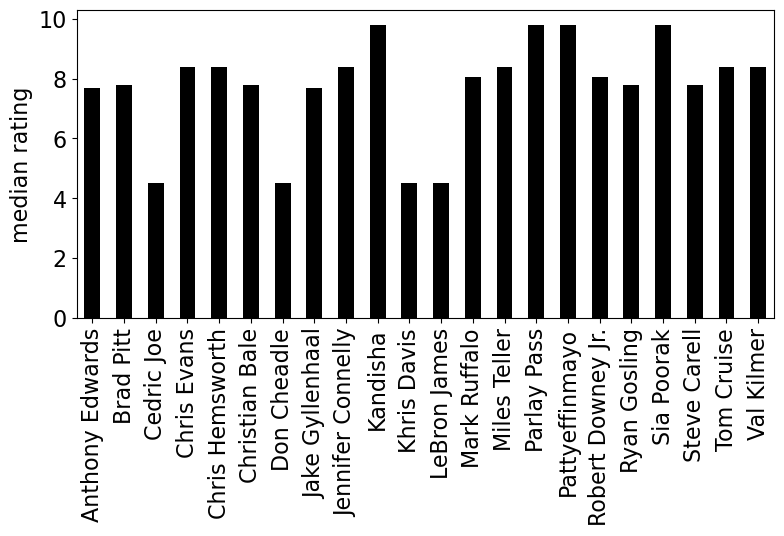

In [64]:
# plot 'median_ratings_by_cast' with the y-axis labelled 'median rating'

def plot_dict(d, label="median rating"):
    #pandas.Series(d):將字典 d 轉換為 Pandas Series（鍵為索引，值為數據）
    #sort_index():按 key排序
    #.plot.bar():繪製長條圖
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16, figsize=(4 + len(d)//4, 4))
    ax.set_ylabel(label, fontsize=16)
    
plot_dict(median_ratings_by_cast)

#### Lab question 18

Create a new **dictionary** where the **key** is a `cast` member and the **value** is the **minimum** `rating` among all of their movies.

Try to use **dictionary comprehension** to answer this question.

Points possible: 4.0

In [65]:
# replace the ... with your code

min_ratings_by_cast = {cast : min(rating) for cast, rating in ratings_by_cast.items()}

min_ratings_by_cast

{'Pattyeffinmayo': 9.8,
 'Parlay Pass': 9.8,
 'Sia Poorak': 9.8,
 'Kandisha': 9.8,
 'Robert Downey Jr.': 7.7,
 'Chris Hemsworth': 8.4,
 'Mark Ruffalo': 7.7,
 'Chris Evans': 8.4,
 'Jake Gyllenhaal': 7.7,
 'Anthony Edwards': 7.7,
 'Tom Cruise': 8.4,
 'Jennifer Connelly': 8.4,
 'Miles Teller': 8.4,
 'Val Kilmer': 8.4,
 'LeBron James': 4.5,
 'Don Cheadle': 4.5,
 'Cedric Joe': 4.5,
 'Khris Davis': 4.5,
 'Christian Bale': 7.8,
 'Steve Carell': 7.8,
 'Ryan Gosling': 7.8,
 'Brad Pitt': 7.8}

In [66]:
student_grader.check("lab-q18", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q18...
Great job! You passed all test cases for this question.


True

Now, **plot** `min_ratings_by_cast` as a **bar plot**.

NOTE: This question will not be graded, but make sure you understand how to do this.

Your plot should look like this:

<div><img src="attachment:q18.jpg" style="height: 300px;"/></div>

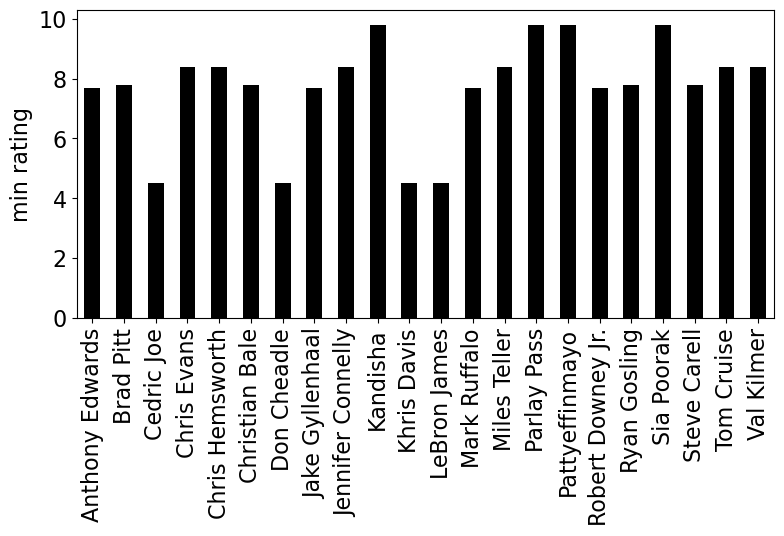

In [67]:
# plot 'min_ratings_by_cast' with the y-axis labelled 'minimum rating'

plot_dict(min_ratings_by_cast, "min rating")

#### Lab question 19

What is the **minimum** `rating` of any movie starring *Mark Ruffalo*? You should use the `min_ratings_by_cast dictionary` from the previous problem to answer this question.

Points possible: 4.0

In [68]:
# replace the ... with your code

mark_ruffalo_min_rating = min_ratings_by_cast["Mark Ruffalo"]

mark_ruffalo_min_rating

7.7

In [69]:
student_grader.check("lab-q19", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q19...
Great job! You passed all test cases for this question.


True

#### Lab question 20

What is the **median** of the **minimum** `rating` of all the `cast` members in the dataset?

You **must** find the **median** of all the values in the `min_ratings_by_cast` **dictionary**.

Points possible: 4.0

In [70]:
# replace the ... with your code

median_min_ratings =  median(min_ratings_by_cast.values())
median_min_ratings

7.8

In [71]:
student_grader.check("lab-q20", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q20...
Great job! You passed all test cases for this question.


True

#### Lab question 21

Which `cast` member's **minimum** `rating` is the **highest**?

There will be **multiple** `cast` members having the **same** **highest** `rating` so you will have to make a **list** containing **all** these names.

**Hint:** You need to find the highest min rating first and then find the specific cast members

Points possible: 5.0

In [72]:
# replace the ... with your code

highest_min_rated_cast = []
highest_min_rating = None

for cast_member in min_ratings_by_cast:
    if highest_min_rating == None or (min_ratings_by_cast[cast_member] > highest_min_rating):
        highest_min_rating = min_ratings_by_cast[cast_member]
        highest_min_rated_cast = [cast_member]  
        
    elif min_ratings_by_cast[cast_member] == highest_min_rating:
        highest_min_rated_cast.append(cast_member)  
        
highest_min_rated_cast

['Pattyeffinmayo', 'Parlay Pass', 'Sia Poorak', 'Kandisha']

In [73]:
student_grader.check("lab-q21", should_get_llm_feedback=False)

Make sure you saved the notebook before running this cell. Running check for lab-q21...
Great job! You passed all test cases for this question.


True

### Submitting the lab

Submit your `p9.ipynb` on Gradescope to the lab-p9 assignment, like usual. Remember that the grades for the lab portion of the project and the actual assignment grade are independent. You will submit the same notebook (at different levels of completion) to two different assignments.

## Project portion (10 questions, 1 function):

## Introduction:

In P8, you created very useful helper functions to parse the raw IMDb dataset. You also created useful data structures to store the data. In this project, you will be building on the work you did in P8 to analyze your favorite movies. This is a shorter project than usual, and **P9 will only have 10 questions for you to solve**.

In P9, you will be analyzing the same dataset that you worked with in P8.

## Project Requirements:

You **may not** hardcode indices in your code, unless the question explicitly asks you to do so. If you open your `.csv` files with Excel, manually count through the rows and use this number to loop through the dataset, this is also considered as hardcoding. If any instances of hardcoding are found during code review, the autograder will **deduct** points from your public score.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because the autograder grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, you will not be awarded any points.

#### Required Functions:
- `get_mapping`
- `get_raw_movies`
- `get_movies`
- `find_specific_movies`
- `bucketize`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, you will not be awarded points.

#### Required Data Structures:
- `movies`
- `cast_buckets`
- `director_buckets`
- `genre_buckets`
- `year_buckets`

You should only define these data structures **once**.

In this project (and the next), you will be asked to create **lists** of movies. For all such questions, **unless it is explicitly mentioned otherwise**, the movies should be in the **same order** as in the `movies.csv` (or `small_movies.csv`) file. Similarly, for each movie, the **list** of `genres`, `directors`, and `cast` members should always be in the **same order** as in the `movies.csv` (or `small_movies.csv`) file.

Students are only allowed to use Python commands and concepts that have been taught in the course prior to the release of P9. Therefore, you should not use the `pandas` module.

### Loading the Movies Data

For all these questions, we will be looking at the movies in `mapping.csv` and `movies.csv`. You can load the list of movies using the functions you wrote in the last project.

We have provided the functions you wrote in `p8.ipynb` to `p9.ipynb` to read the movies data. The functions included are `process_csv`, `get_mapping`, `get_raw_movies`, and `get_movies`. DO NOT modify these. Later in P9, we will provide you with a simpler version of the function `find_specific_movies`, which does not require the use of the `copy` module.

In [88]:
# definition of process_csv from previous projects (p6 or p7)
# definition of get_mapping from p8.ipynb
# DO NOT MODIFY THIS CELL

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

def get_mapping(path):
    csv_rows = process_csv(path)
    mapping_dict = {}
    for row in csv_rows:
        mapping_dict[row[0]] = row[1]
    return mapping_dict


In [89]:
# definition of get_raw_movies from p8.ipynb
# DO NOT MODIFY THIS CELL

def get_raw_movies(path):
    csv_rows = process_csv(path)
    csv_header = csv_rows[0]
    csv_data = csv_rows[1:]
    
    raw_movies_list = []
    for row in csv_data:
        movie_dict = {}
        for i in range(len(csv_header)):
            if csv_header[i] in ['year', 'duration']:
                movie_dict[csv_header[i]] = int(row[i])
            elif csv_header[i] in ['genres', 'directors', 'cast']:
                movie_dict[csv_header[i]] = row[i].split(", ")
            elif csv_header[i] == 'rating':
                movie_dict[csv_header[i]] = float(row[i])
            else:
                movie_dict[csv_header[i]] = row[i]
        raw_movies_list.append(movie_dict)   
    return raw_movies_list


In [90]:
# definition of get_movies from p8.ipynb
# DO NOT MODIFY THIS CELL

def get_movies(movies_path, mapping_path):
    movies_data = get_raw_movies(movies_path)
    mapping_data = get_mapping(mapping_path)
    for movie in movies_data:
        movie['title'] = mapping_data[movie['title']]
        for i in range(len(movie['directors'])):
            movie['directors'][i] = mapping_data[movie['directors'][i]]
        for i in range(len(movie['cast'])):
            movie['cast'][i] = mapping_data[movie['cast'][i]]    
    return movies_data


#### Data loading

Now, you can use `get_movies` to read the data in `movies.csv` and `mapping.csv` as you did in P8.

Points possible: 1.0

In [91]:
# create a list of dictionaries named 'movies' to store the data in 'movies.csv' and 'mapping.csv' as in p8
# replace the ... with your code

movies = get_movies("movies.csv", "mapping.csv")

# do NOT display the value of this variable anywhere in this notebook

In [92]:
student_grader.check("movies", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for movies...
Great job! You passed all test cases for this question.


True

There should be *75123* **dictionaries** in the **list** `movies` and the first entry of `movies` should be a **dictionary** that looks as follows:

```python
{'title': 'Countdown',
 'year': 1996,
 'duration': 90,
 'genres': ['Crime', 'Mystery', 'Thriller'],
 'rating': 3.9,
 'directors': ['Keoni Waxman'],
 'cast': ['Yûki Amami', 'Lori Petty', 'Jason London', 'James Le Gros']}
```

Also, just like in P8, delete any cells displaying the whole of `movies` data structure before turning in `p9.ipynb`.

In P8, you were provided with a function `find_specific_movies` which functioned as some sort of a 'search bar' for the movies dataset. However, in order to use that function properly, you had to use the `copy` module to pass a *copy* of your list of movies to `find_specific_movies`. Making copies frequently is **not** a good coding practice. For this project, we will provide **a new version** of `find_specific_movies` that does **not** require using `copy`. Please go through the following function:

In [93]:
# modified find_specific_movies (doesn't require using copy module)
# DO NOT modify this function

def find_specific_movies(movies, keyword):
    """
    find_specific_movies(movies, keyword) takes a list of movie dictionaries 
    and a keyword; it returns a list of movies that contain the keyword
    in either its title, genre, cast or directors.
    """
    movies_with_keyword = []
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['cast']):
            movies_with_keyword.append(movie)
    return movies_with_keyword

**Important:** **Even when you are not explicitly prompted to do so, using the `find_specific_movies` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of `find_specific_movies`.**

### Analyzing the Movies data

#### Project Question 1

What is the **median** `rating` of the movies that **involve** both *Clint Eastwood* and *Sergio Leone*?

You **must** make multiple calls to the `find_specific_movies` function to identify the movies which involve both *Clint Eastwood* and *Sergio Leone*.

Points possible: 8.0

In [96]:
# compute and store the answer in the variable 'median_eastwood_leone_rating'

Clint = find_specific_movies(movies, "Clint Eastwood")
Sergio = find_specific_movies(movies, "Sergio Leone")

moviee = [movie for movie in Clint if movie in Sergio]
ratings = [movie['rating'] for movie in moviee]

median_eastwood_leone_rating = median(ratings)
median_eastwood_leone_rating

8.2

In [97]:
student_grader.check("q1", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q1...
Great job! You passed all test cases for this question.


True

#### Project Question 2

Among all the *Toy Story* movies, which ones are the **highest** rated?

Your output **must** be a **list** of **dictionaries**. You **must** use `find_specific_movies` to identify all movies which have *Toy Story* as a substring of their `title`. You may assume there is no cast member or director named *Toy Story*, or any genre called *Toy Story*.

**Hint:** You could first find the **highest** `rating` that any *Toy Story* movie received, and then find all the *Toy Story* movies that received that `rating`.

Points possible: 8.0

In [98]:
toy_story_movies = find_specific_movies(movies, 'Toy Story')

highest_rated_toy_story_movies = None

if toy_story_movies:
    highest_toy_story_rating = max(movie['rating'] for movie in toy_story_movies)
    highest_rated_toy_story_movies = [movie for movie in toy_story_movies if movie['rating'] == highest_toy_story_rating]

highest_rated_toy_story_movies

[{'title': 'Toy Story 3',
  'year': 2010,
  'duration': 103,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 8.3,
  'directors': ['Lee Unkrich'],
  'cast': ['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Ned Beatty']},
 {'title': 'Toy Story',
  'year': 1995,
  'duration': 81,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 8.3,
  'directors': ['John Lasseter'],
  'cast': ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney']}]

In [99]:
student_grader.check("q2", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q2...
Great job! You passed all test cases for this question.


True

#### Function 1: `bucketize(movies_list, category)`

This function should take in a **list** of movie **dictionaries** as well as a **category** (i.e. `title`, `year`, `duration`, `genres`, `rating`, `directors`, or `cast`), and *bucketize* the **list** of movie **dictionaries** by this **category**.

For example, the output of `bucketize(movies, 'rating')` should be a **dictionary** so that all the unique values of `rating` of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that rating (e.g., the value of the key *6.4* should be the **list** of movie dictionaries with `rating` of *6.4*).

The output of `bucketize(movies, 'rating')` should look like this:

```python
{3.9: [{'title': 'Countdown',
       'year': 1996,
       'duration': 90,
       'genres': ['Crime', 'Mystery', 'Thriller'],
       'rating': 3.9,
       'directors': ['Keoni Waxman'],
       'cast': ['Yûki Amami', 'Lori Petty', 'Jason London', 'James Le Gros']},
      {'title': 'A Darker Reality',
       'year': 2008,
       'duration': 88,
       'genres': ['Horror'],
       'rating': 3.9,
       'directors': ['Chris Kazmier'],
       'cast': ['Daniel Baldwin', 'James C. Burns', 'Sunny Doench', 'Alisha Seaton']},
       ...
      ],
 4.1: [{'title': 'Shadows & Lies',
      'year': 2010,
      'duration': 100,
      'genres': ['Crime', 'Drama'],
      'rating': 4.1,
      'directors': ['Jay Anania'],
      'cast': ['James Franco', 'Julianne Nicholson', 'Martin Donovan', 'Josh Lucas']},
     {'title': 'Paramedics',
      'year': 1988,
      'duration': 90,
      'genres': ['Comedy'],
      'rating': 4.1,
      'directors': ['Stuart Margolin'],
      'cast': ['George Newbern', 'Christopher McDonald', 'John P. Ryan', 'James Noble']},
       ...
      ],
 ...
}
```

Similarly, the output of `bucketize(movies, 'cast')` should be a **dictionary** so that all the unique `cast` members of the movies in `movies` are the **keys** and the corresponding **values** would be a **list** of all movie **dictionaries** with that cast member as one of their `cast` (e.g., the value of the key *Kate Winslet* should be the **list** of movie dictionaries with *Kate Winslet* as one of their `cast` members).

The output of `bucketize(movies, 'cast')` should look like this:

```python
{'Peter Coyote': [{'title': 'Outrageous Fortune',
                      'year': 1987,
                      'duration': 99,
                      'genres': ['Comedy'],
                      'rating': 6.2,
                      'directors': ['Arthur Hiller'],
                      'cast': ['Shelley Long', 'Bette Midler', 'Peter Coyote', 'Robert Prosky']},
                     {'title': 'Sphere',
                      'year': 1998,
                      'duration': 134,
                      'genres': ['Action', 'Mystery', 'Sci-Fi'],
                      'rating': 6.1,
                      'directors': ['Barry Levinson'],
                      'cast': ['Dustin Hoffman', 'Sharon Stone', 'Samuel L. Jackson', 'Peter Coyote']},
                   ...
                  ],
 'Tchéky Karyo': [{'title': 'Vincent and Me',
                      'year': 1990,
                      'duration': 100,
                      'genres': ['Drama', 'Family', 'Fantasy'],
                      'rating': 6.2,
                      'directors': ['Michael Rubbo'],
                      'cast': ['Tchéky Karyo', 'Nina Petronzio', 'Christopher Forrest', 'Paul Klerk']},
                     {'title': 'Utopía',
                      'year': 2003,
                      'duration': 106,
                      'genres': ['Fantasy', 'Sci-Fi', 'Thriller'],
                      'rating': 5.2,
                      'directors': ['Maria Ripoll'],
                      'cast': ['Leonardo Sbaraglia', 'Najwa Nimri', 'Tchéky Karyo', 'José Garcia']},
                   ...
                  ]
 ...
} 
```

**Hints:** Note that depending on whether or not the `category` represents a **list** or not, your function will have to behave differently. In P8, you created a function `bucketize_by_genre` that *bucketized* the list of movies by their genre. Take a moment to find that function; it will help you here. Also, take a moment to look at the buckets you made in Lab-P9.

Points possible: 7.0

In [100]:
# replace the ... with your code to finish the definition of bucketize

def bucketize(movie_list, category):
    buckets = {}
    for movie in movie_list:
        category_value = movie[category]  #TODO: access the category value from a movie
        # TODO: bucketize depending on the type of `category_value`
        if type(category_value) == list: 
            for value in category_value:
                if value not in buckets:
                    buckets[value] = []  
                buckets[value].append(movie) 
        else:
            if category_value not in buckets:
                buckets[category_value] = []  
            buckets[category_value].append(movie)
                
    return buckets


In [101]:
student_grader.check("bucketize", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for bucketize...
Great job! You passed all test cases for this question.


True

**Important:** Just like `get_movies`, `bucketize` is quite a time-consuming function to run. Hence, you do **not** want to call `bucketize` on the same list of movies and category **more than once**. Throughout the project, we will frequently use bucketized lists of movies organized by their `cast`, `directors`, `genre`, and `year`. Rather than calling `bucketize` several times, we will store the bucketized lists in the following variables:

#### Data Structure 1: `cast_buckets`

Points possible: 3.0

In [102]:
# define `cast_buckets`, but do NOT display the output here

# bucketize the full list of movies by their cast.
cast_buckets =  bucketize(movies, 'cast')

In [103]:
student_grader.check("cast_buckets", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for cast_buckets...
Great job! You passed all test cases for this question.


True

#### Data Structure 2: `director_buckets`

Points possible: 3.0

In [104]:
# define `director_buckets`, but do NOT display the output here

# bucketize the full list of movies by their directors.
director_buckets = bucketize(movies, "directors")


In [105]:
student_grader.check("director_buckets", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for director_buckets...
Great job! You passed all test cases for this question.


True

#### Data Structure 3: `genre_buckets`

Use the `bucketize` function to bucketize by the `genres`

Points possible: 3.0

In [106]:
# define `genre_buckets`, but do NOT display the output here

# bucketize the full list of movies by their genres.
genre_buckets = bucketize(movies, "genres")


In [107]:
student_grader.check("genre_buckets", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for genre_buckets...
Great job! You passed all test cases for this question.


True

#### Data Structure 4: `year_buckets`

Use the `bucketize` function to bucketize by the `year`

Points possible: 3.0

In [108]:
# define `year_buckets`, but do NOT display the output here

# bucketize the full list of movies by their year.
year_buckets = bucketize(movies, "year")


In [109]:
student_grader.check("year_buckets", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for year_buckets...
Great job! You passed all test cases for this question.


True

Even when you are not explicitly prompted to do so, using these data structures and the `bucketize` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of these data structures and the `bucketize` function.

Remember, you can still use the `bucketize` function on a subset of the `movies` data structure (i.e. not the whole `movies` dataset). You are **not** limited to only using the variables defined above.

#### Project Question 3

List the movies that *Margot Robbie* was `cast` in.

Your output **must** be a **list** of **dictionaries**. You **must** answer this question by accessing the **value** of the correct **key** from the correct **bucket** defined in the previous cell.

Points possible: 8.0

In [111]:
# compute and store the answer in the variable 'robbie_movies', then display it

robbie_movies = bucketize(movies, 'cast')['Margot Robbie'] 
robbie_movies

[{'title': 'The Suicide Squad',
  'year': 2021,
  'duration': 132,
  'genres': ['Action', 'Adventure', 'Comedy'],
  'rating': 7.2,
  'directors': ['James Gunn'],
  'cast': ['Margot Robbie', 'Idris Elba', 'John Cena', 'Joel Kinnaman']},
 {'title': 'Z for Zachariah',
  'year': 2015,
  'duration': 98,
  'genres': ['Drama', 'Romance', 'Sci-Fi'],
  'rating': 6.0,
  'directors': ['Craig Zobel'],
  'cast': ['Chiwetel Ejiofor', 'Chris Pine', 'Margot Robbie']},
 {'title': 'Bombshell',
  'year': 2019,
  'duration': 109,
  'genres': ['Biography', 'Drama'],
  'rating': 6.8,
  'directors': ['Jay Roach'],
  'cast': ['Charlize Theron',
   'Nicole Kidman',
   'Margot Robbie',
   'John Lithgow']},
 {'title': 'Suite Française',
  'year': 2014,
  'duration': 107,
  'genres': ['Drama', 'Romance', 'Thriller'],
  'rating': 7.0,
  'directors': ['Saul Dibb'],
  'cast': ['Michelle Williams',
   'Kristin Scott Thomas',
   'Margot Robbie',
   'Eric Godon']},
 {'title': 'Dreamland',
  'year': 2019,
  'duration': 

In [112]:
student_grader.check("q3", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q3...
Great job! You passed all test cases for this question.


True

#### Project Question 4

Compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre**.

Points possible: 8.0

In [113]:
# first compute and store the dictionary in the variable 'genre_num', then display it

genre_num = {genre: len(movie) for genre, movie in bucketize(movies, 'genres').items()}
genre_num


{'Crime': 10875,
 'Mystery': 5654,
 'Thriller': 11011,
 'Drama': 41960,
 'Romance': 12652,
 'Adventure': 7103,
 'Comedy': 24973,
 'Music': 1665,
 'Horror': 9503,
 'Action': 12133,
 'Family': 3557,
 'Fantasy': 3621,
 'Biography': 2586,
 'Documentary': 1396,
 'History': 2311,
 'War': 1903,
 'Animation': 2135,
 'Western': 1309,
 'Musical': 1569,
 'Sci-Fi': 3396,
 'Film-Noir': 673,
 'Sport': 1143,
 'News': 20,
 'Reality-TV': 1}

In [114]:
student_grader.check("q4", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q4...
Great job! You passed all test cases for this question.


True

Now, **plot** `genre_num` as a **bar graph**. 

NOTE: This question will not be graded, but make sure you understand how to do this.

Your plot should look like this:

<div style="text-align: center;"><img src="attachment:q4.jpg" style="height: 300px;"/></div>

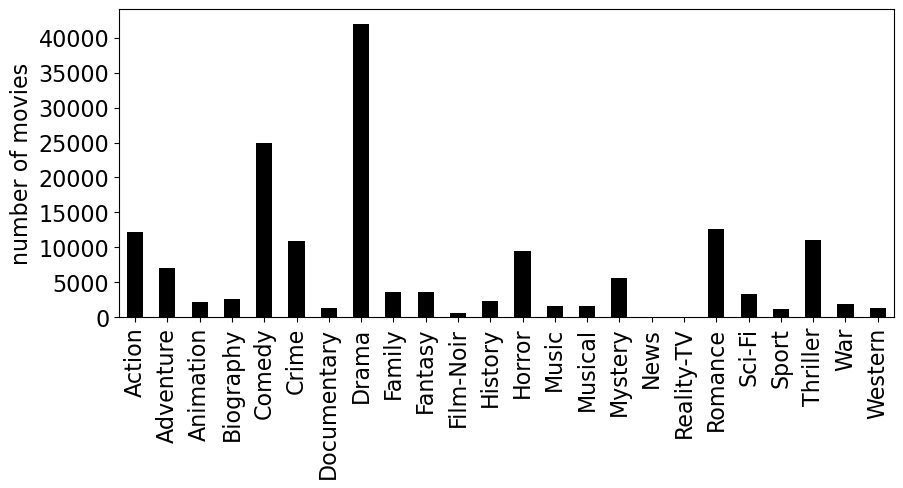

In [115]:
# plot 'genre_num' with the y-axis labelled 'number of movies'

plot_dict(genre_num,label = 'number of movies')


**Food for thought:** Can you tell what the most popular **genres** are from the plot? Do you see anything surprising in this plot?

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


#### Project Question 5

Compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre** directed by *Stanley Kubrick*.

You **must** only include those `genres` in which *Stanley Kubrick* has directed **at least** one movie

**Hint:** Think about how you can use functions such as `bucketize` on a subset of movies for the category that you are interested in.

Points possible: 8.0

In [122]:
k_movies = [movie for movie in movies if 'Stanley Kubrick' in movie['directors']]

kubrick_genres = {genre: len(movie) for genre, movie in bucketize(k_movies, 'genres').items()}

kubrick_genres

{'Crime': 3,
 'Sci-Fi': 2,
 'Drama': 9,
 'Mystery': 1,
 'Thriller': 2,
 'Adventure': 3,
 'War': 5,
 'Film-Noir': 2,
 'Comedy': 1,
 'Horror': 1,
 'Biography': 1}

In [123]:
student_grader.check("q5", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q5...
Great job! You passed all test cases for this question.


True

Now, **plot** `kubrick_genres` as a **bar graph**. Your plot should look like this:

<div style="text-align: center;"><img src="attachment:q5.jpg" style="height: 300px;"/></div>

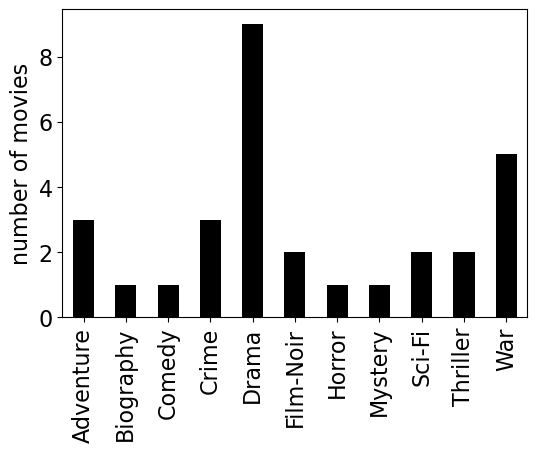

In [124]:
# now plot 'kubrick_genres' with the y-axis labelled 'number of movies'

plot_dict(kubrick_genres,label = 'number of movies')

**Food for thought:** Can you similarly **plot** the **number** of films directed by your favorite director or starring your favorite cast member in each **genre**?

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


#### Project Question 6

Compute a **dictionary** which maps each **decade** to the **number** of Sci-Fi movies in released in that **decade**. This dictionary should look like this:

```python
{'1991 to 2000': 389,
 '1981 to 1990': 381,
 '1971 to 1980': 240,
 '2011 to 2020': 1109,
 '2001 to 2010': 529,
 '2021 to 2030': 285,
 '1951 to 1960': 198,
 '1961 to 1970': 202,
 '1911 to 1920': 6,
 '1941 to 1950': 24,
 '1931 to 1940': 29,
 '1921 to 1930': 4}
```

**Hint:** You should use `year_to_decade` function to get the decade for a movie's year

Points possible: 8.0

In [137]:
# first compute and store the dictionary in the variable 'sci_fi_decade_mapping', then display it
sci_mov = [movie for movie in movies if 'Sci-Fi' in movie['genres']]

sci_fi_decade_mapping = {}

for movie in sci_mov:
    decade = year_to_decade(movie['year'])
    sci_fi_decade_mapping[decade] = sci_fi_decade_mapping.get(decade, 0) + 1

sci_fi_decade_mapping

{'1991 to 2000': 389,
 '1981 to 1990': 381,
 '1971 to 1980': 240,
 '2011 to 2020': 1109,
 '2001 to 2010': 529,
 '2021 to 2030': 285,
 '1951 to 1960': 198,
 '1961 to 1970': 202,
 '1911 to 1920': 6,
 '1941 to 1950': 24,
 '1931 to 1940': 29,
 '1921 to 1930': 4}

In [138]:
student_grader.check("q6", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q6...
Great job! You passed all test cases for this question.


True

Now, **plot** `sci_fi_decade_mapping` as a **bar graph**. Your plot should look like this:

<div style="text-align: center;"><img src="attachment:q6.jpg" style="height: 300px;"/></div>

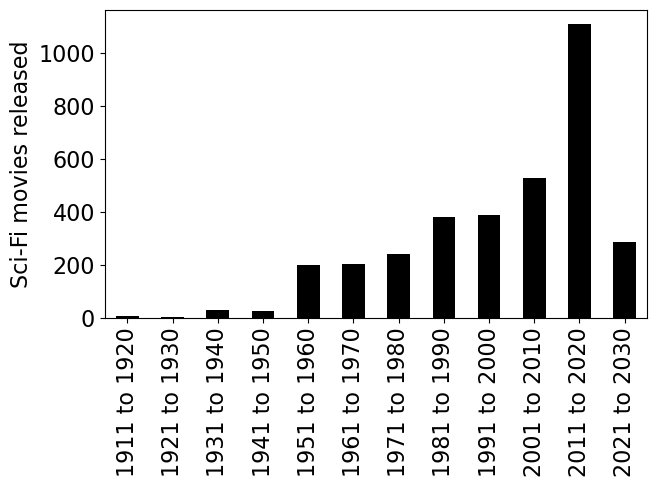

In [135]:
# now plot 'sci_fi_decade_mapping' with the y-axis labelled 'Sci-Fi movies released'
plot_dict(sci_fi_decade_mapping,label = 'Sci-Fi movies released')

**Food for thought:** Can you explain the shape of this plot? Why do you think the number of Sci-Fi movies increased so rapidly over the last decade? If you want, you could compare this plot against plots of other genres (such as `Western` or `Horror`).

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


#### Project Question 7

Compute a **dictionary** which maps each **genre** of movies directed by *James Cameron* to the **median** `rating` of all of the movies he directed in that **genre**. Note that your dictionary **must not** contain any genres in which *James Cameron* has not directed any movie.

Points possible: 8.0

In [143]:
# first compute and store the dictionary in the variable 'cameron_median_genres', then display it

cameron_movies = [movie for movie in movies if 'James Cameron' in movie['directors']]
cameron_median_genres = { genre: median([movie['rating'] for movie in movie_list]) for genre, movie_list in bucketize(cameron_movies, 'genres').items()
}

cameron_median_genres

{'Action': 8.0,
 'Adventure': 7.75,
 'Fantasy': 7.75,
 'Drama': 7.7,
 'Romance': 7.9,
 'Sci-Fi': 8.25,
 'Comedy': 7.3,
 'Thriller': 5.55,
 'Mystery': 7.5,
 'Horror': 3.8}

In [144]:
student_grader.check("q7", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q7...
Great job! You passed all test cases for this question.


True

Now, **plot** `cameron_median_genres` as a **bar graph**. Your plot should look like this:

<div style="text-align: center;"><img src="attachment:q7.jpg" style="height: 300px;"/></div>

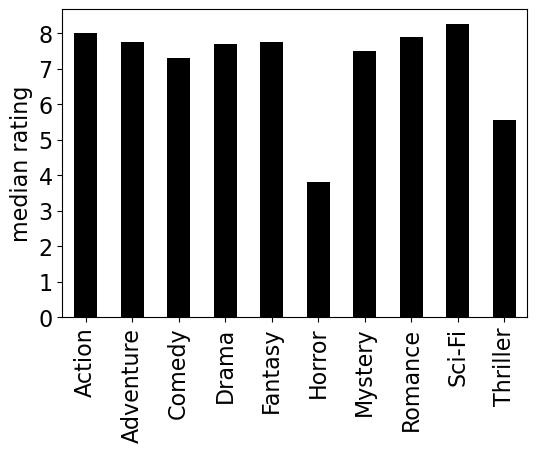

In [146]:
# now plot 'cameron_median_genres' with the y-axis labelled 'median rating'

plot_dict(cameron_median_genres,label = 'median rating')


**Food for thought:** *James Cameron* has directed many critically acclaimed movies such as *Aliens*, *The Terminator*, *Avatar*, and *Titanic*. Nevertheless, median ratings of his work in the *Thriller*, and especially *Horror* genres are surprisingly lackluster. Can you explain this inconsistency?

Hint: Take a look at the years of release of the films in these genres. 

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


The visualization in Question 7 immediately tells us that the **median** *Fantasy* movie directed by *James Cameron* is rated higher than the **median** *Horror* movie. However, it is a little hard to tell how the **median** *Romance* movie fares against the **median** *Adventure* movie. In order to compare the `genres`, it would be useful to **sort** the `genres` by their **median** `rating`.

Refer [Mike's](???) or [Louis'](???) lecture notes on using function references to sort a collection by value(s) related to that collection's elements.

#### Project Question 8

Produce a **list** of `genres` of films directed by *James Cameron* sorted in **decreasing order** of their **median** `rating`.

**Hint:** Refer to Task 4.2 in the lab to understand how to sort a collection using the `key` parameter.

Points possible: 8.0

In [151]:
# compute and store the answer in the variable 'cameron_genres_desc', then display it

cameron_mov = [movie for movie in movies if 'James Cameron' in movie['directors']]

median_genres = {genre: median([movie['rating'] for movie in movie_list])for genre, movie_list in bucketize(cameron_mov, 'genres').items()}

cameron_genres_desc = sorted(median_genres.keys() ,key = lambda genre: median_genres[genre], reverse=True)

cameron_genres_desc

['Sci-Fi',
 'Action',
 'Romance',
 'Adventure',
 'Fantasy',
 'Drama',
 'Mystery',
 'Comedy',
 'Thriller',
 'Horror']

In [152]:
student_grader.check("q8", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q8...
Great job! You passed all test cases for this question.


True

#### Project Question 9

Produce a **list** of movies directed by *Martin Scorsese* and starring *Robert De Niro* sorted in **increasing** order of their `year` of release.

Your output **must** be a **list** of **dictionaries** of movies having *Martin Scorsese* as one of the `directors`, and *Robert De Niro* as one of the `cast` members, that are **sorted** in **increasing** order of their `year`.

Points possible: 8.0

In [153]:
# compute and store the answer in the variable 'scorsese_de_niro_movies', then display it

scorsese_de_niro_movies = [movie for movie in movies if 'Martin Scorsese' in movie['directors'] and 'Robert De Niro' in movie['cast']]

scorsese_de_niro_movies = sorted(scorsese_de_niro_movies, key=lambda movie: movie['year'])

scorsese_de_niro_movies

[{'title': 'Mean Streets',
  'year': 1973,
  'duration': 112,
  'genres': ['Crime', 'Drama', 'Thriller'],
  'rating': 7.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Harvey Keitel', 'David Proval', 'Amy Robinson']},
 {'title': 'Taxi Driver',
  'year': 1976,
  'duration': 114,
  'genres': ['Crime', 'Drama'],
  'rating': 8.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro',
   'Jodie Foster',
   'Cybill Shepherd',
   'Albert Brooks']},
 {'title': 'New York, New York',
  'year': 1977,
  'duration': 155,
  'genres': ['Drama', 'Music', 'Musical'],
  'rating': 6.6,
  'directors': ['Martin Scorsese'],
  'cast': ['Liza Minnelli',
   'Robert De Niro',
   'Lionel Stander',
   'Barry Primus']},
 {'title': 'Raging Bull',
  'year': 1980,
  'duration': 129,
  'genres': ['Biography', 'Drama', 'Sport'],
  'rating': 8.1,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Cathy Moriarty', 'Joe Pesci', 'Frank Vincent']},
 {'title': 'The King of Comedy

In [154]:
student_grader.check("q9", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q9...
Great job! You passed all test cases for this question.


True

**Food for thought:** Can you think of other famous director-actor combinations? Can you find a combination with more movies than *Scorsese* and *De Niro*?

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


#### Finding the best `directors`

Notice that the movie with the **highest** `rating` in the dataset is

```python
{'title': 'Ardhambardha Premakathe',
 'year': 2023,
 'duration': 136,
 'genres': ['Comedy', 'Romance'],
 'rating': 9.8,
 'directors': ['Aravind Kaushik'],
 'cast': ['Abhilash M', 'Dwarish Abhilash', 'K.P. Aravind', 'Ashwathi']}
```

This movie is one of the only two movies directed by this `director`. It is hardly appropriate to use this one movie to hail this director as one of the best ever given the small sample size. Moreover, **seven out of the top ten** highest rated movies in the dataset happen to be from the `year` **2023** or **2024**, while **over half of the top hundred** highest rated movies were released after the `year` *2020*. This is explained by the fact that IMDb `ratings` tend to be **inflated** soon after release, and *settle* down after a while.

Therefore, if we want to identify who the **best** directors are, it would be a good idea to ignore the movies that were released **after** the `year` *2020*, and to restrict our attention to `directors` who have directed a **decent number** of movies. 

#### Project Question 10

Produce a **list** of `directors` who have directed **at least** *10* movies, have a **median** `rating` of **at least** *7.5*, and have a **minimum** `rating` of **at least** *5.0*. You **must** **exclude** all movies released **after** the `year` *2020*.

Your output **must** be a **list** of the names of the `directors`. The order does **not** matter.

**Hint**: You must first create a **list** of movies **excluding** the movies released **after** the `year` *2020*. Then, among these movies, you must find the `directors` who have directed `>= 10` movies, and whose movies have a **median** `rating` of `>= 7.5`, as well as a **minimum** `rating` of `>= 5.0`.

Points possible: 8.0

In [157]:
# compute and store the answer in the variable 'best_directors', then display it

movieee = [movie for movie in movies if movie['year'] <= 2020]

director_ratings = {}

for movie in movieee:
    for director in movie['directors']:
        if director not in director_ratings:
            director_ratings[director] = []
        director_ratings[director].append(movie['rating'])

best_directors = [director for director, ratings in director_ratings.items() if len(ratings) >= 10 and median(ratings) >= 7.5 and min(ratings) >= 5.0]
best_directors

['Shyam Benegal',
 'Sergiu Nicolaescu',
 'Theodoros Angelopoulos',
 'Christopher Nolan',
 'P. Padmarajan',
 'William Wyler',
 'Ingmar Bergman',
 'Quentin Tarantino',
 'Stanley Kubrick',
 'Ertem Egilmez',
 'Yoshikazu Yasuhiko',
 'Yasujirô Ozu',
 'Akira Kurosawa',
 'Jean-Pierre Melville',
 'Martin Scorsese',
 'S. Shankar',
 'Mani Ratnam',
 'S.S. Rajamouli',
 'David Fincher',
 'Michael Cacoyannis',
 'Gulzar',
 'Rituparno Ghosh',
 'Masaki Kobayashi',
 'Singeetam Srinivasa Rao',
 'Tim Van Someren',
 'Goran Markovic',
 'Satyajit Ray',
 'Preston Sturges',
 'Sibi Malayil',
 'Nikita Mikhalkov',
 'K. Balachander',
 'Hayao Miyazaki',
 'Oldrich Lipský',
 'Georgiy Daneliya',
 'Krzysztof Kieslowski',
 'Bahram Beyzaie']

In [159]:
student_grader.check("q10", should_get_llm_feedback=False) 

Make sure you saved the notebook before running this cell. Running check for q10...
Great job! You passed all test cases for this question.


True

**Food for thought:** How many of these directors can you recognize? Do you spot your favorite director in that list? Can you come up with better criteria for deciding who the best directors are?

In [ ]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


## Submission

Make sure you have run all cells in your notebook in order before submitting on Gradescope. Your notebook should not contain any uncaught Exceptions, otherwise the Gradescope autograder will not give you any points.